In [9]:
%pylab inline
from scipy.fftpack import fftshift as fts

Populating the interactive namespace from numpy and matplotlib


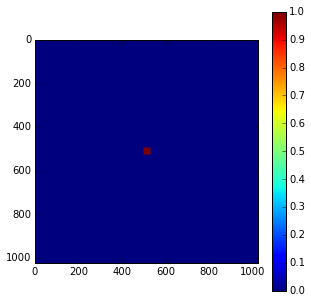

In [70]:
matriz=zeros((1024,1024))
for i in range(496,528,1):
    for j in range(496,528,1):
        matriz[i][j]=1

figure(figsize(5,5))
imshow(matriz)
colorbar()
        

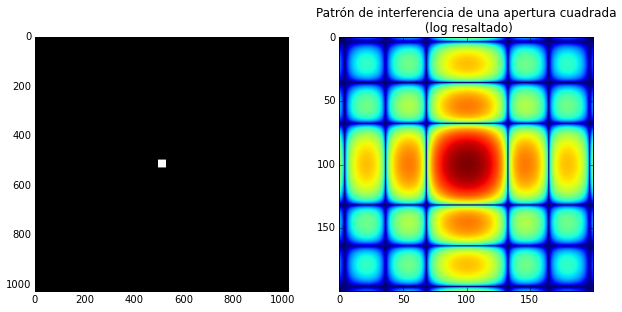

In [73]:
DFmatriz=fft2(matriz)
SDFmatriz=fftshift(DFmatriz)


centro=zeros((200,200))
k=0
m=0
for i in range(412,612,1):
    for j in range(412,612,1):
            centro[k][m]= log((abs(SDFmatriz[i][j])**2)+1)
            m=m+1
            if m>199:
                m=0
    k+=1

fig=figure(figsize(10,5))
ax1 =subplot2grid((1,2),(0,0))
ax2 =subplot2grid((1,2),(0,1))
ax1.imshow(matriz,cmap='gray')
ax2.imshow(centro)
ax2.set_title('Patrón de interferencia de una apertura cuadrada \n (log resaltado)')

In [74]:
matriz=zeros((1024,1024))
for i in range(412,612,1):
    for j in range(450,470):
        matriz[i][j]=1
        matriz[i][j+104]=1        

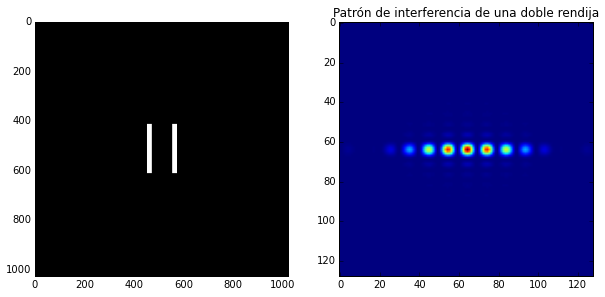

In [75]:
DFmatriz=fft2(matriz)
SDFmatriz=fftshift(DFmatriz)


centro=zeros((128,128))
k=0
m=0
for i in range(448,576,1):
    for j in range(448,576,1):
            centro[k][m]=(abs(SDFmatriz[i][j])**2)
            m=m+1
            if m>127:
                m=0
    k+=1

fig=figure(figsize(10,5))
ax1 =subplot2grid((1,2),(0,0))
ax2 =subplot2grid((1,2),(0,1))
ax1.imshow(matriz,cmap='gray')
ax2.imshow(centro)
ax2.set_title('Patrón de interferencia de una doble rendija')

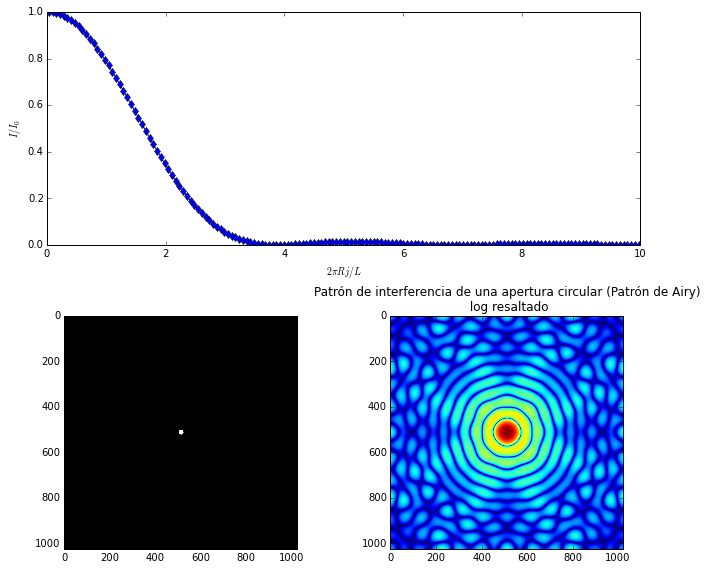

In [63]:
matriz=zeros((1024,1024))
radio=0.01
r=radio*1024
for i in range(1024):
    for j in range(1024):
        d=(i-512)**2+(j-512)**2
        if d<r**2:
            matriz[i][j]=1

DFmatriz=fft2(matriz)
SDFmatriz=fftshift(DFmatriz)

airy=zeros((1024,1024))
k=0
m=0
for i in range(1024):
    for j in range(1024):
            airy[k][m]=(abs(SDFmatriz[i][j])**2)
            m=m+1
            if m>1023:
                m=0
    k+=1

abcisas=2*pi*(0.01)/1.*linspace(-512,512,1024)
Io=max(airy[512])
I=(airy[512])
Inor=I/Io


fig=figure(figsize(10,8))

ax1 =subplot2grid((2,2),(0,0), colspan=2)
ax2 =subplot2grid((2,2),(1,0))
ax3 =subplot2grid((2,2),(1,1))

ax1.plot(abcisas,Inor,'-d')
ax1.set_xlim([0,10])
ax1.set_ylim([0,1])
ax1.set_xlabel('$2\pi Rj/L$')
ax1.set_ylabel('$I/I_0$')


ax2.imshow(matriz,cmap='gray')

airy =log(airy+1)
ax3.imshow(airy)
ax3.set_title('Patrón de interferencia de una apertura circular (Patrón de Airy)\n log resaltado')
fig.tight_layout()
show()

